<a href="https://colab.research.google.com/github/jorozcoh/se-ales/blob/main/QuizFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero se importan las librerias necesarias para realizar las transformadas de Fourier, operaciones y matematicas y posterior graficación

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

# **1.a) Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add these 3 sine waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown at the beginning of the section.**


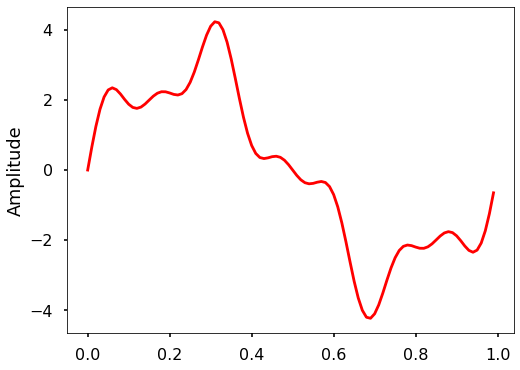

In [2]:
# frecuencia de muestreo
sr = 100
# se define el intervalo de muestreo
ts = 1.0/sr
t = np.arange(0,1,ts)
# se crean 3 funciones, la primera con frecuencia de 1Hz y amplitud de 3, la segunda con 4Hz de frecuencia y 1 de amplitud 
#y la tercera con 7 Hz de frecuencia  y 0.5 de A.
#Posteriormente se realiza la suma de las 3 y se grafica  el resultado
freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

#se llama a la función para graficar la funcion resultante de la suma
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

1.b) Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Apply this function to the signal we generated above and plot the result

In [3]:
def DFT(x):
    """
    
    Función para calcular la transformada de Fourier discreta en una función real de una dimensión
    """

    #acá simplemente se está creando la función compleja y realizando el producto punto con cada punto dela función discreta, que es precisamente
    # la definción de Transformada de Fourier en el mundo discreto
    N = len(x)  
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


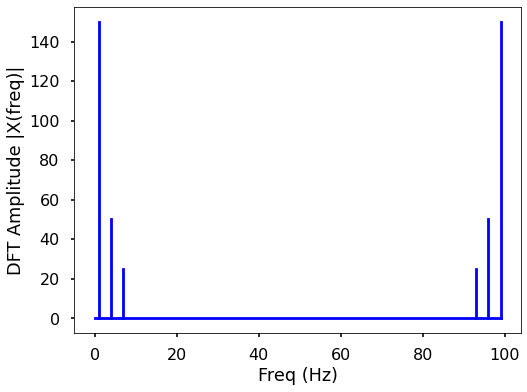

In [4]:
#se llama la función para calcular la transformada de la función del literal a
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T #se define la frecuencia de muestreo a partir del numero de muestras y el sampling rate

#se genera la función para graficar la transformada
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

1.c) Write a function to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate.

ejemplo con la frecuencia de Nyquist que es la mitad de la frecuencia de muestreo cuando  la señal es simétrica como el de la gráfica previa. Como solo se necesita muestrear una frecuencia menor a 20, es posible reducir la frecuencia de muestreo porque no se necesita tan alta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


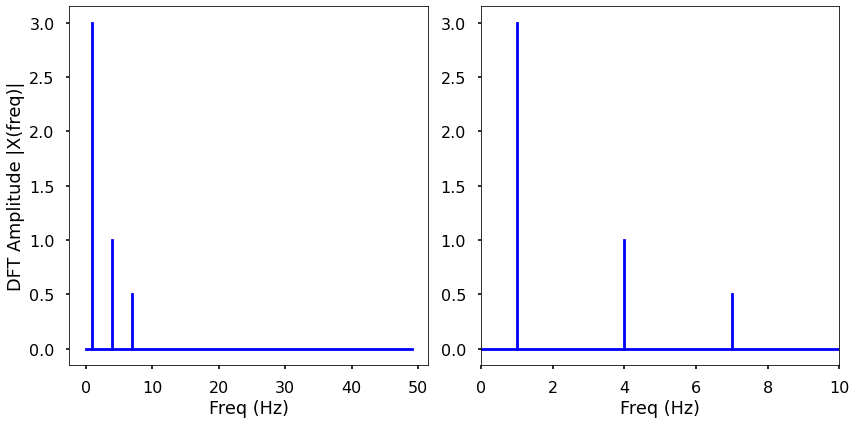

In [5]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10) #se evalua la transformada pero solo hasta el valor de 10 porque es suficiente para mostrar las frecuencias
plt.tight_layout()
plt.show()


In [6]:
def gen_sig(sr):
    '''
    función que genera diversas funciones con la libertad de cambiar la frecuencia de muestreo a través de alterar el valor de sr
    '''
    ts = 1.0/sr #tiempo de muestreo 
    t = np.arange(0,1,ts) #barrido de del tiempo que es la función independiente

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [7]:
# funcion pero ahora con frecuencia de muestreo de 2048
sr = 2048
%timeit DFT(gen_sig(sr))

533 ms ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# frecuencia de muestreo de 5000. Se ve que mientras más se aumenta la frecuencia de muestreo, más se le exige al computador, 
#que se evidencia en el tiempo que le toma correr el código.
sr = 5000
%timeit DFT(gen_sig(sr))

3.41 s ± 744 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# **2a) ¿Cómo funciona el algoritmo? Comprenda en detalle la siguiente información:**


In [9]:
import numpy as np
def DFT_slow(x):
    """se genera nuevamente la función para calcular la transformada de fourier de una función"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [10]:
#se realizan la transformada de Fourier normal y la rápida con el fin de luego compararlas
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [11]:
#se demuestra que la transformada rápida en tiempos del orden de microsegundos, mientras que la normal lo hace en ms, evidenciando que la rápida es igual
# de certera pero que lo hace en menos tiempo
#pues toma en cuenta las simetrías de algunos de los intervalos de frecuencia y reduce el procesamiento 
#(hace transformadas por intervalos o desglosa la función en pares e impares y logra obtener la transformada en menos tiempo)
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

126 ms ± 741 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
16.1 µs ± 303 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Para explicar de mejor forma la FFT vamos a plantear una función que muestre paso por paso lo que hace y luego compararemos 

In [12]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    #se generan condicionales de cuando realizar la partición para la transformada rápida
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    #si el numero de datos es menor a 32, no es necesario realizar la transformada rápida 
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    #aquí se parte la función a la que se le aplicada la transformada en partes par e impar con el objetivo de ahorrar recursos computacionales
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])

In [13]:
from numpy import random
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

True

In [14]:
"Se muestra que el orden de tiempo para ejecutar la transformada era el esperado, la transformada normal es la más lenta, la creada"
"por nosotros es el medio"
"y la más rápida sigue siendo la de numpy"
%timeit DFT_slow(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

127 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.08 ms ± 76.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16 µs ± 87.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Vectorización de la transformada de fourier

In [15]:
"Del código pasamos se ve que en esencia lo que se hace es discriminar la función en su parte par e impar para ahorrar recursos y realizar los productos"
"puntos por separado. En este código se genera una matriz con los vectores pares e impares para que no sean muchos productos puntos sino una sola" 
"operación, haciendo todavía más eficiente el código "


def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

In [16]:
x = np.random.random(1024)
np.allclose(FFT_vectorized(x), np.fft.fft(x))

True

In [17]:
#Si bien se logró bajar el tiempo con la función de FFT al vectorizar, se mantiene que la función de numpy sigue siendo la más rápida
x = np.random.random(1024 * 16)
%timeit FFT(x)
%timeit FFT_vectorized(x)
%timeit np.fft.fft(x)

136 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.73 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
300 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


2b)Use the FFT function to calculate the Fourier transform of the above signal. Plot the amplitude spectrum for both the two-sided and one-side frequencies.


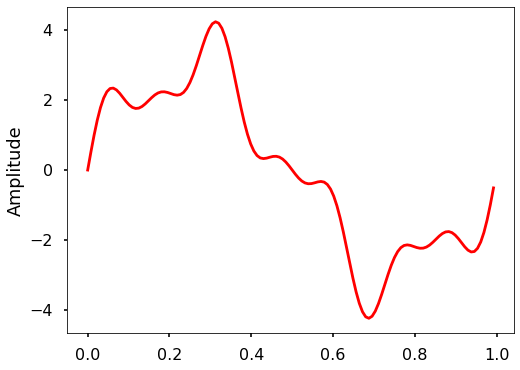

In [18]:
"El objetivo ahora es generar la función del punto 1 y aplicarle es la FFT en lugar de la DFT"
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


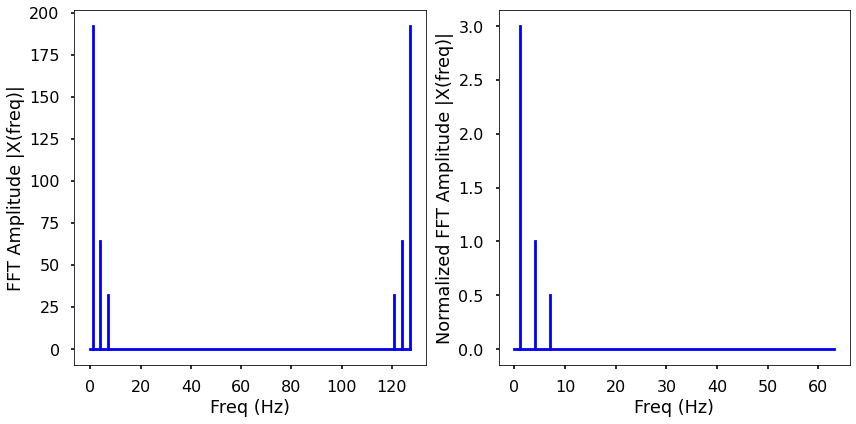

In [19]:
"Se observa  la periodicidad y simetría de la FFT, por lo que se omite uno de los pedazos ya que es innecesario "
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

2c)Generate a simple signal for length 2048, and time how long it will run the FFT and compare the speed with the DFT.


In [20]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [21]:
"Al comparar el tiempo que le tomó a la FFT con la DFT del punto 1c(385ms) bajo la misma frecuencia de muestreo se muestra que la diferencia es muy notable"
",siendo la FFT mucho más rápida"
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

21 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# **3.a) Explore the electricity demand from California from 2019-11-30 to 2019-12-30**


In [22]:
import pandas as pd
import numpy as np
from numpy.fft import fft, ifft

In [23]:
df = pd.read_csv('930-data-export.csv', 
                 delimiter=',', parse_dates=[1])
df.rename(columns={'Timestamp (Hour Ending)':'hour',
                   'Demand (MWh)':'demand'},
          inplace=True)

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


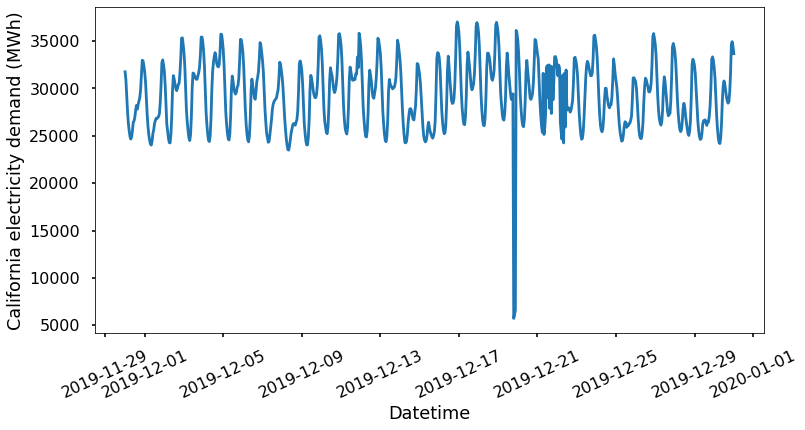

In [24]:
# La gráfica nos muestra la demanda de Energía eléctrica en MWh en función de las fechas, como fue cambiando
plt.figure(figsize = (12, 6))
plt.plot(df['hour'], df['demand'])
plt.xlabel('Datetime')
plt.ylabel('California electricity demand (MWh)')
plt.xticks(rotation=25) 
plt.show()

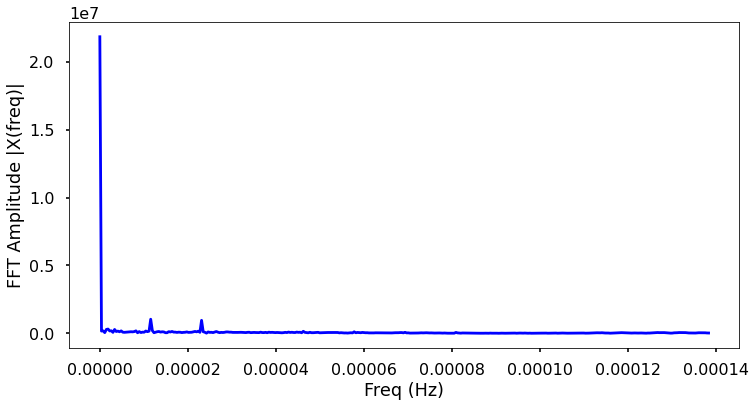

In [25]:
X = fft(df['demand'])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]
#La idea de la transformada para este caso es determinar con certeza cuando y con que frecuencia las personas demandan más energía en el estado
#de California
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


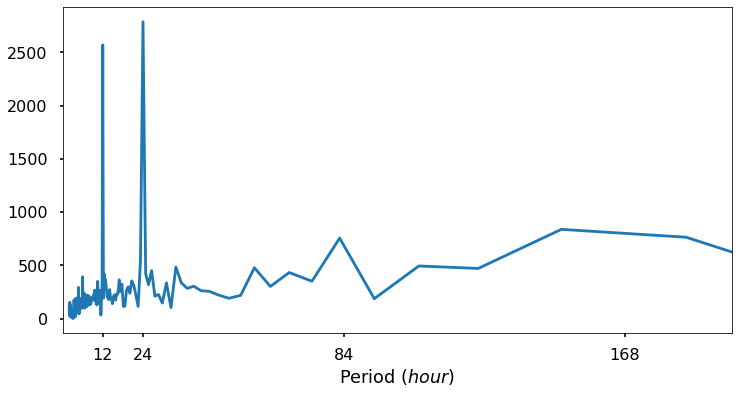

In [26]:
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

#Al realizar la conversión de frecuencia a Horas fue posible entender el patrón de cada tantas horas transcurridas las personas
#demandan más electricidad, lo cual tiene todo el sentido del mundo que ocurran pasadas 12 y 24 horas, debido a nuestros horarios en general.
plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.show()

3.b) Filtering a signal using FFT


In [27]:
from scipy.fftpack import fftfreq

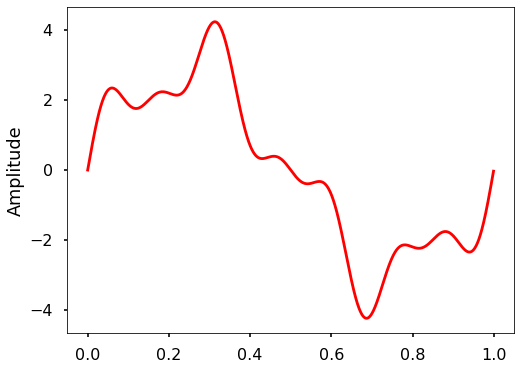

In [28]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

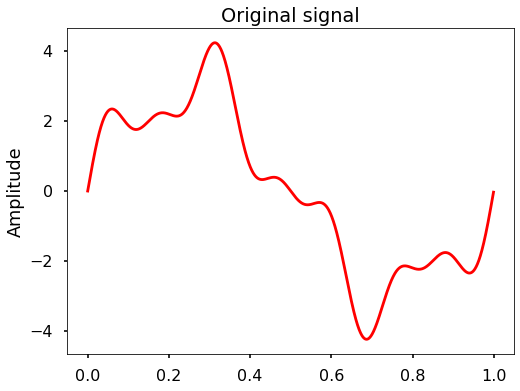

In [29]:
plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original signal')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


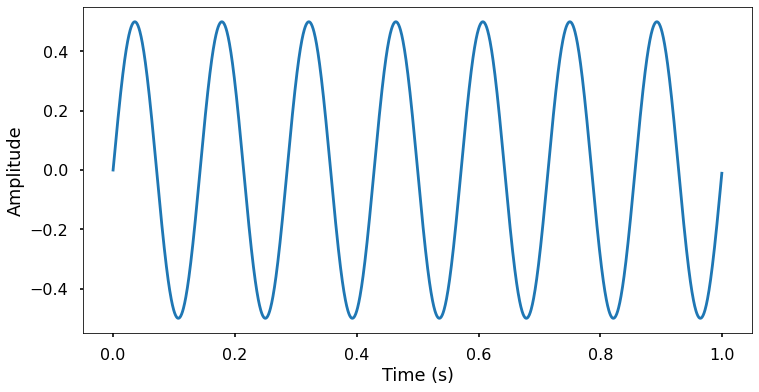

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


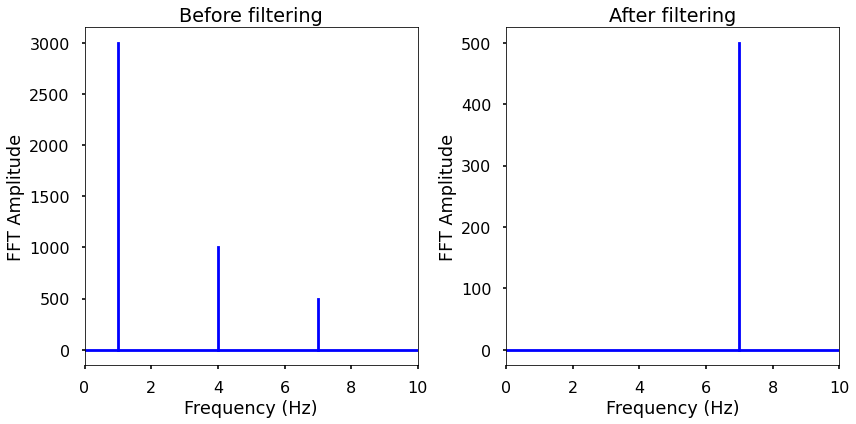

In [31]:
"Para realizar el filtro de cualquier tipo es mucho más fácil teniendo ya la transformada de fourier, pues solo basta  con"
"crear un condicional y decir que a partir de cierto valor de x (frecuencia) no pasen los datos de la señal(se asignan ceros) y listo, que es"
"precisamente lo que se está haciendo en este código."
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()